In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = '/home/wagnernegrao/Downloads/corona/corona/output/datasetCompleto.csv'

In [3]:
df = pd.read_csv(filename, sep=',')
df['data'] = pd.to_datetime(df['data'])
df = df.sort_values(['data', 'hora'], ascending=[False, True])
df['hora'] = df.hora.apply(lambda hora: hora.replace(':', ''))
df['hora'] = df['hora'].astype(int)

In [4]:
routes = df.rota.unique().tolist()

In [5]:
df = df.loc[df['data'].dt.month != 8] # dia 8 com erro
df = df.loc[df['data'].dt.month != 12] # dia 12 com erro

In [6]:
def difference(hours, time_difference):
    difference = []
    
    for i in range(len(time_difference)):
        difference.append((hours[i], time_difference[i]))
    
    return(difference)

In [7]:
def hours():
    hours = []
    
    for hour in range(0, 24):
        hours.append(hour)
    
    return(hours)

In [8]:
def time_increased(difference, flag=str):
    time = []
    hour = []
    
    for i in range(len(difference)):
        if(difference[i][1] > 0):
            time.append(difference[i][1])
            hour.append(difference[i][0])
            
    if(flag == 'time'):
        return(time)
    elif(flag == 'hour'):
        return(hour)

In [9]:
def time_decreased(difference, flag=str):
    time = []
    hour = []
    
    for i in range(len(difference)):
        if(difference[i][1] < 0):
            time.append(difference[i][1])
            hour.append(difference[i][0])
            
    if(flag == 'time'):
        return(time)
    elif(flag == 'hour'):
        return(hour)

In [10]:
def time_neutre(difference, flag=str):
    time = []
    hour = []

    for i in range(len(difference)):
        if(difference[i][1] == 0):
            time.append(difference[i][1])
            hour.append(difference[i][0])

    if(flag == 'time'):
        return(time)
    elif(flag == 'hour'):
        return(hour)

In [11]:
def images_path():
    path = os.getcwd()
    path = path + '/images/'
    
    return(path)

In [28]:
def plot_line (title, day1, day2, _difference, time_difference):

    figure = plt.figure(figsize=(15,7))

    plt.plot(hours(), time_difference, color='black')
    plt.scatter(time_increased(_difference,'hour'), time_increased(_difference,'time'), color='red', label='Piora (x > 0)')
    plt.scatter(time_decreased(_difference,'hour'), time_decreased(_difference,'time'), color='green',label='Melhora (x < 0)')
    plt.scatter(time_neutre(_difference,'hour'), time_neutre(_difference,'time'), color='blue', label='Neutro (x = 0)')

    plt.xlabel('Hora do Dia')
    plt.ylabel("Diferença percentual do tempo de percurso")
    plt.title(f'{title} \n ({day1} - {day2})')
       
    plt.legend(title='Status', loc='best')
    plt.xticks(range(0,24))
    plt.grid()

#     path = images_path()
#     filename = path + title + ' - ' + day1 + ".eps"

#     figure.savefig(filename, bbox_inches='tight', format='eps', dpi=1000)

    plt.show()

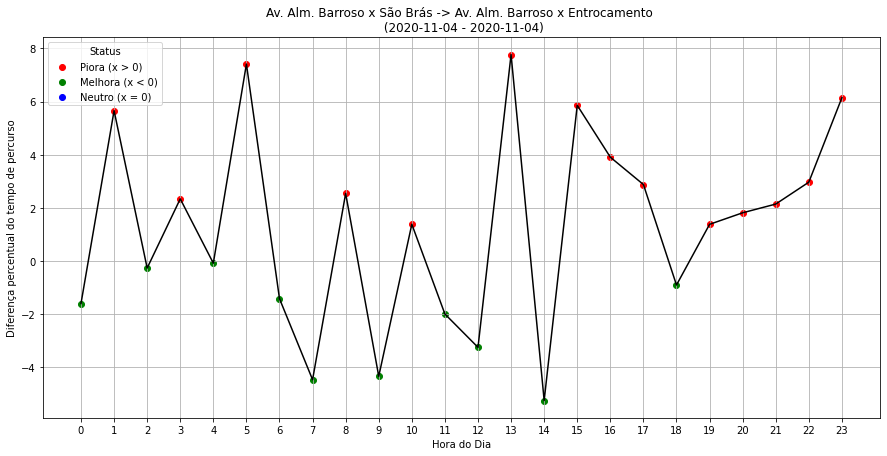

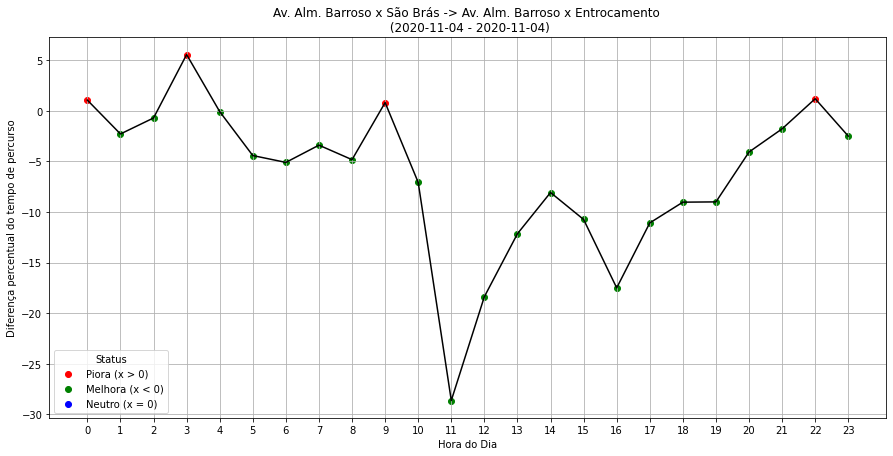

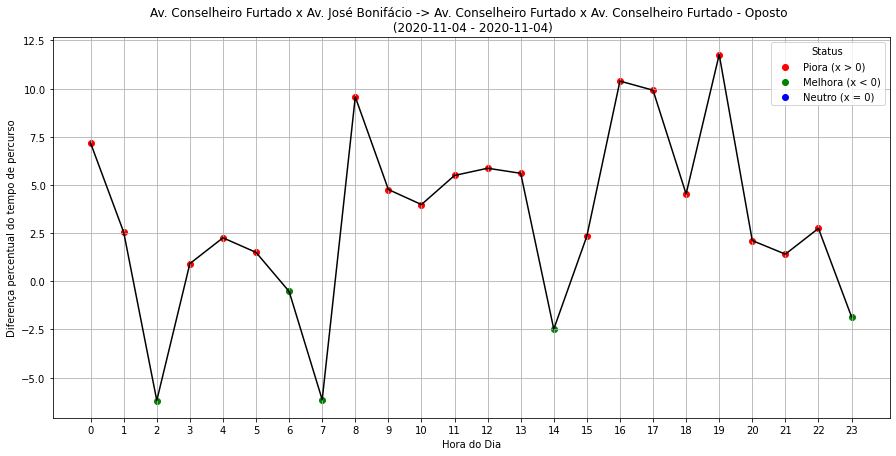

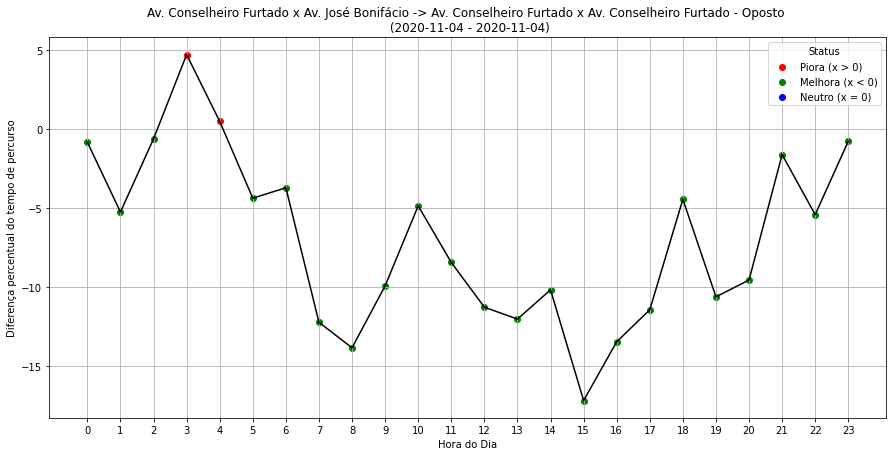

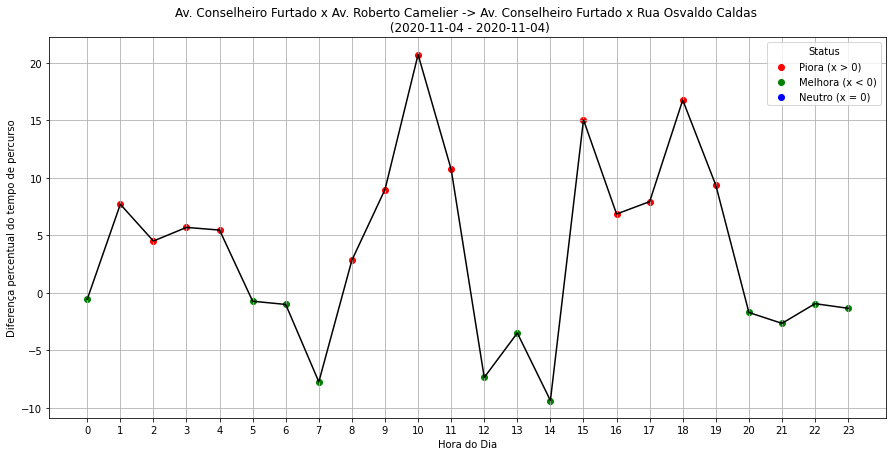

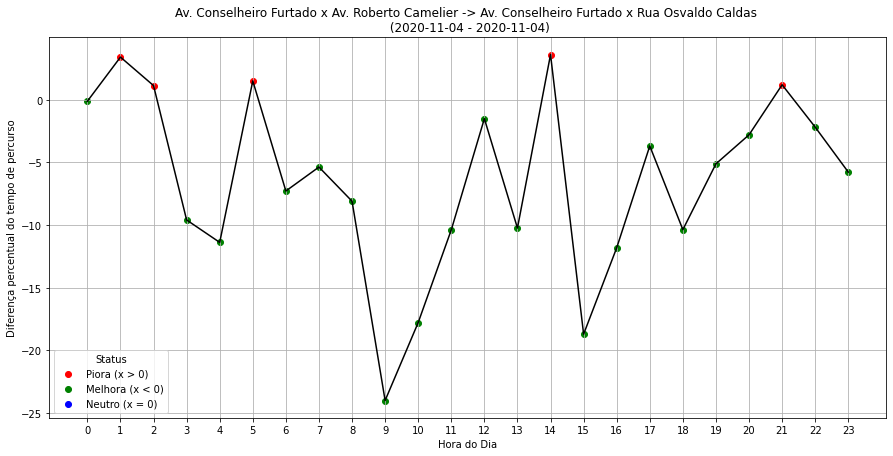

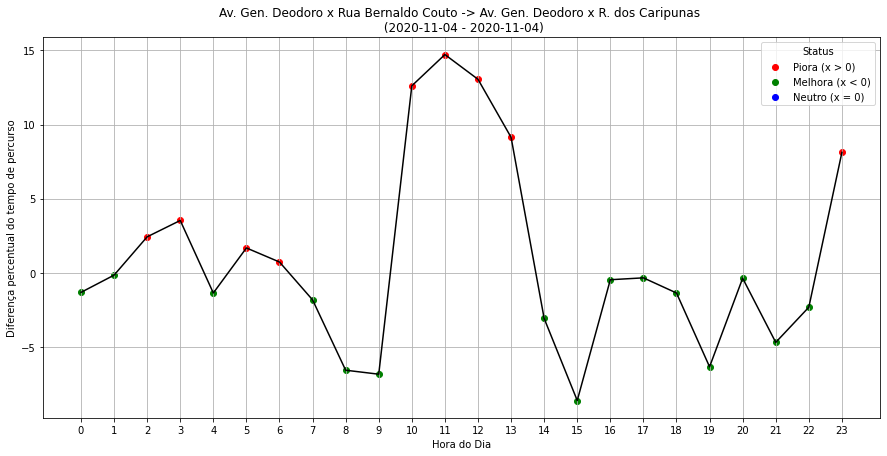

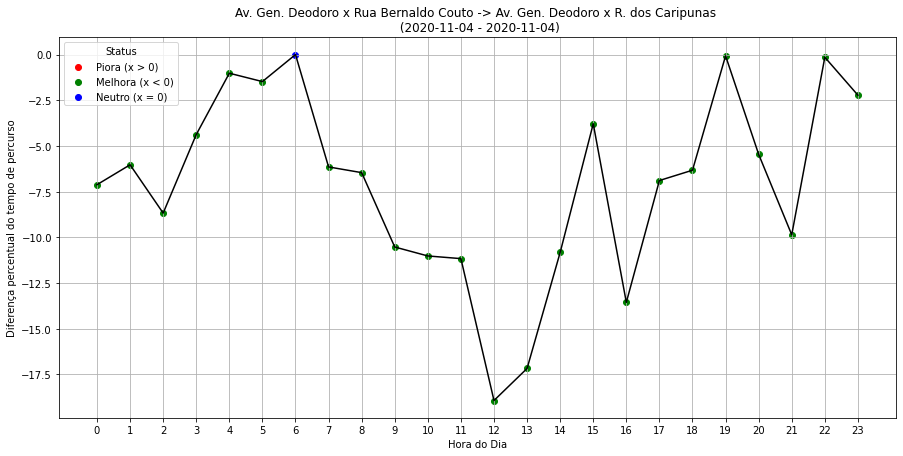

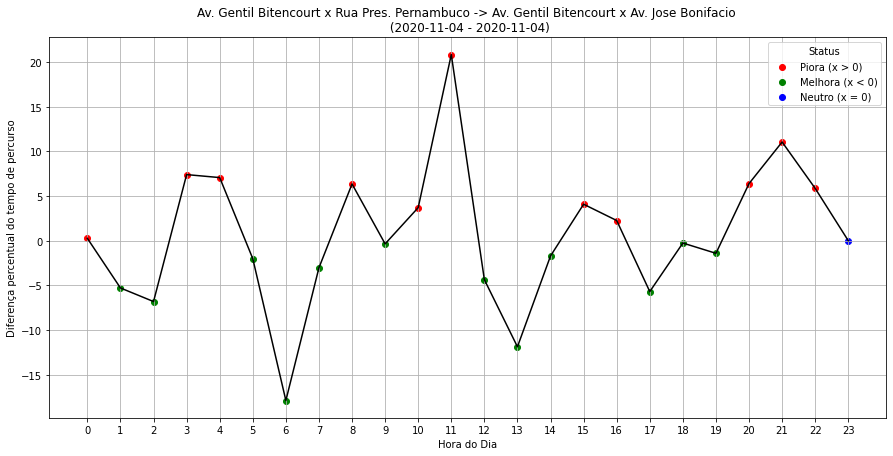

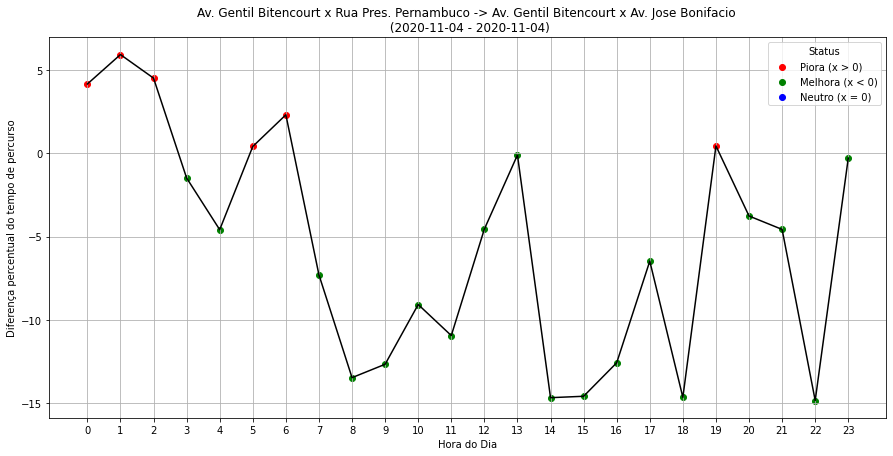

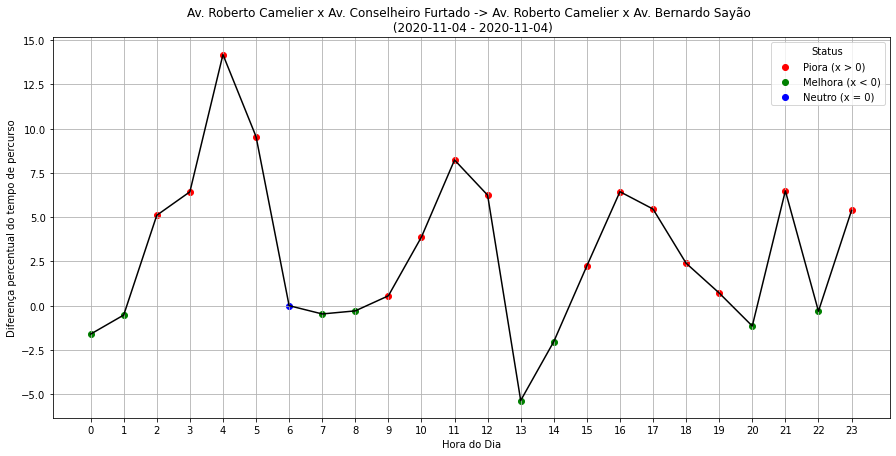

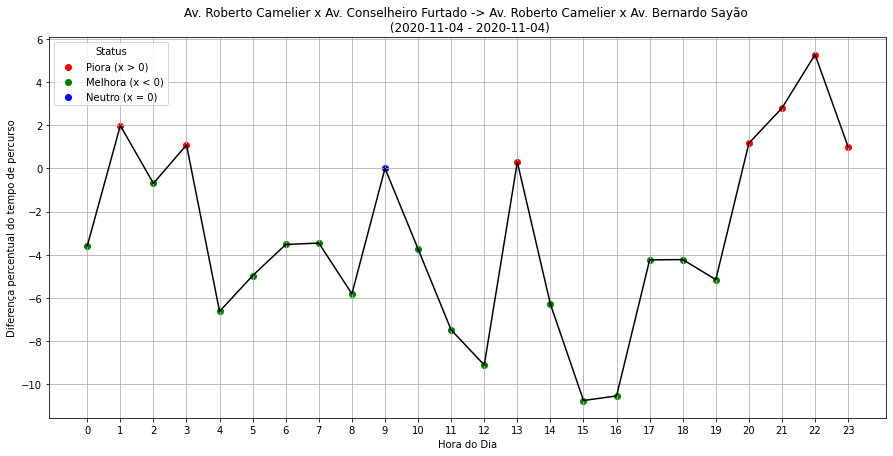

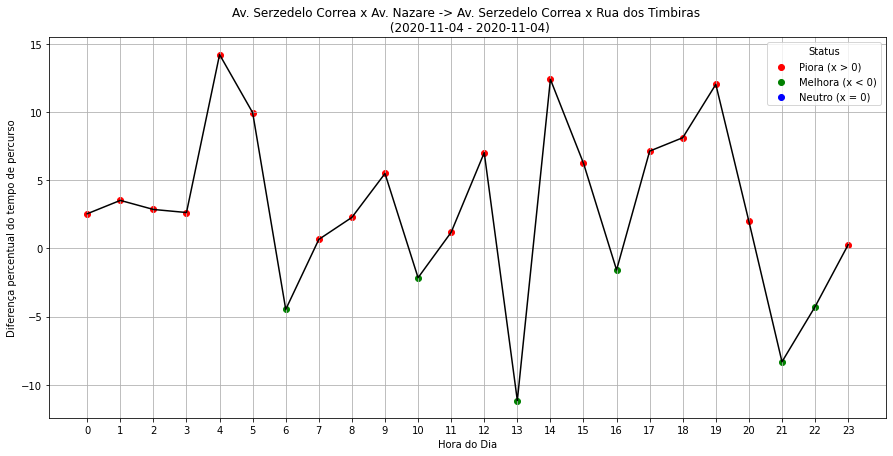

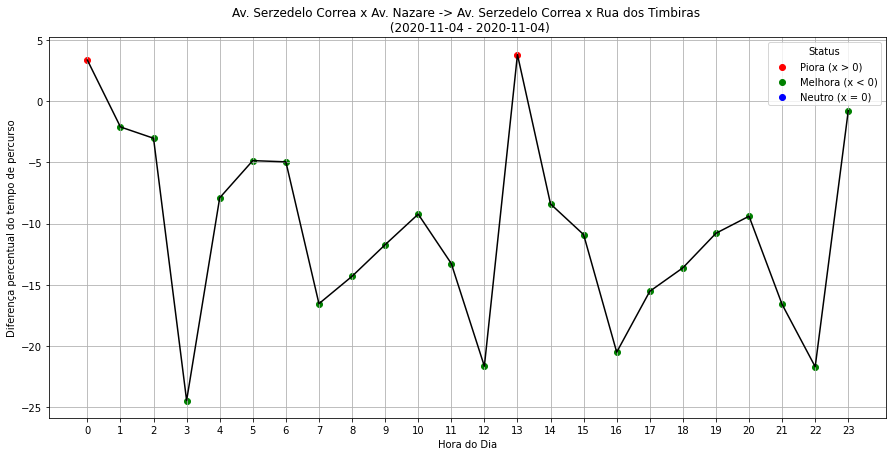

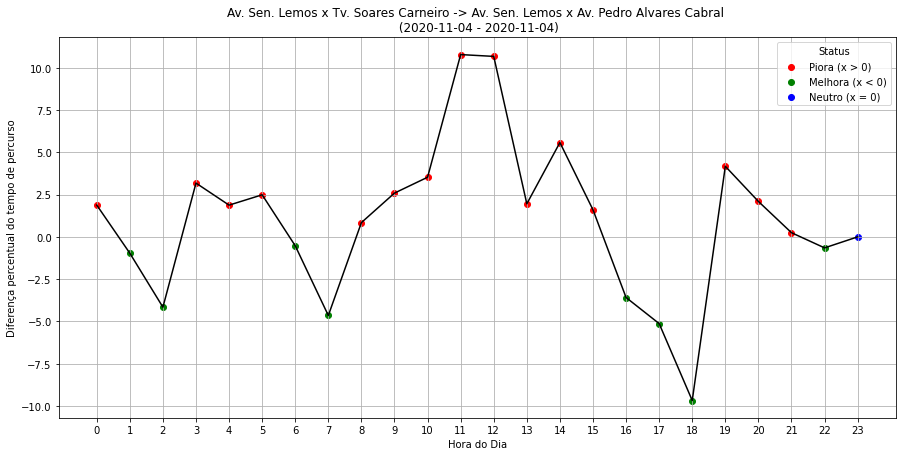

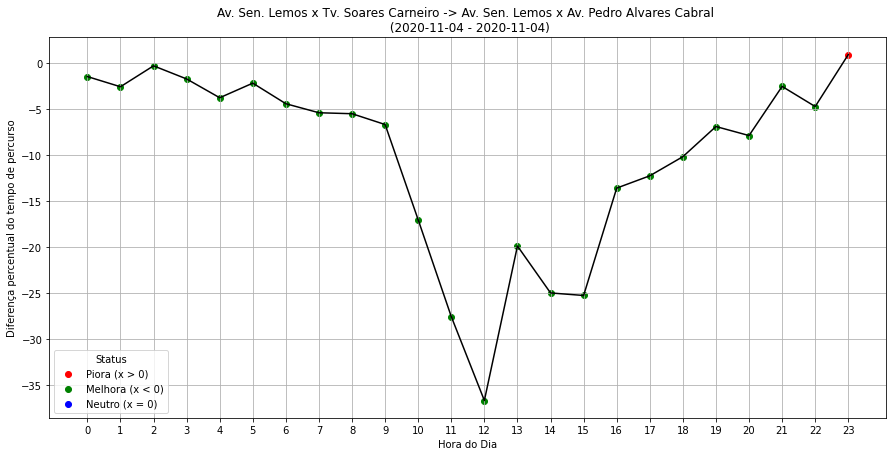

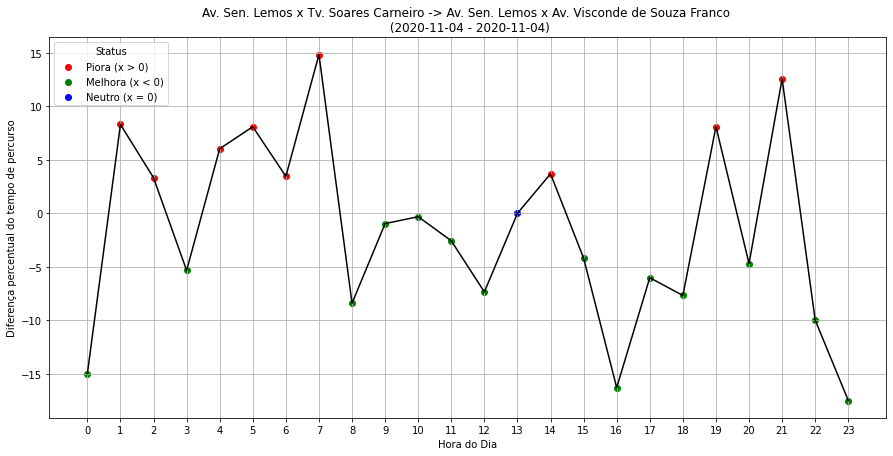

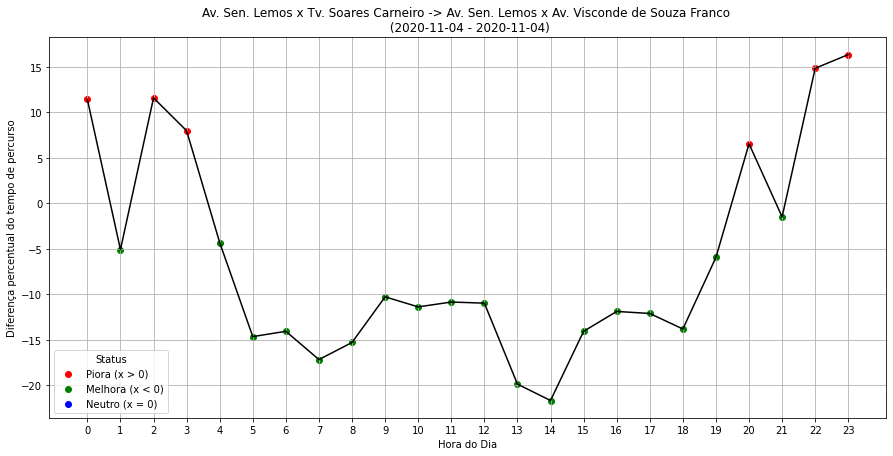

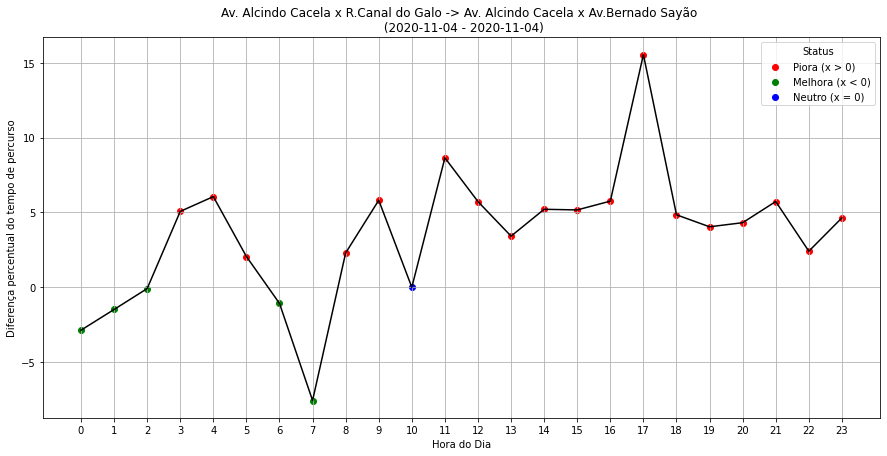

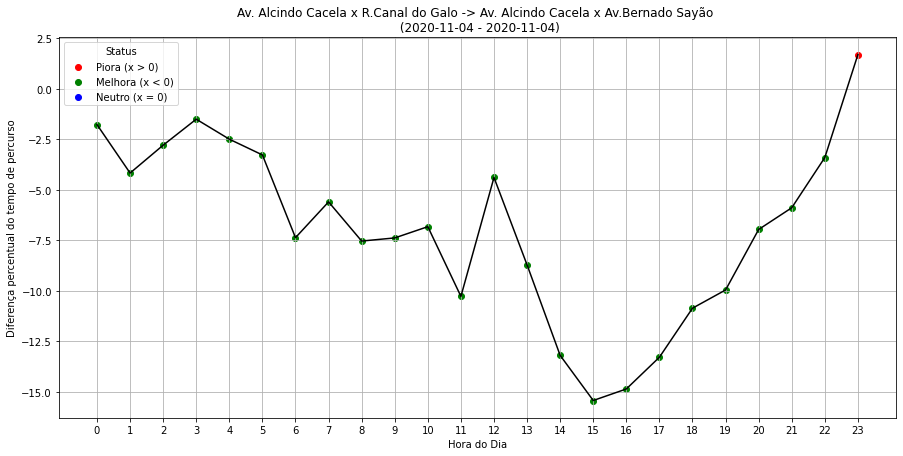

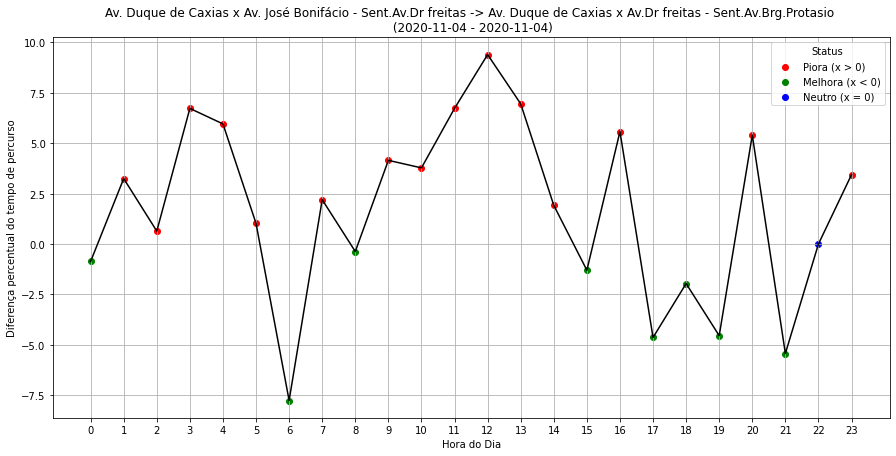

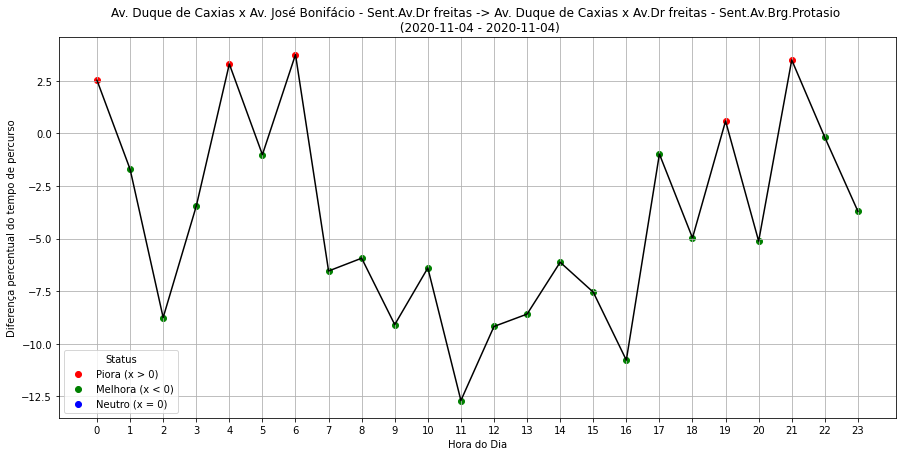

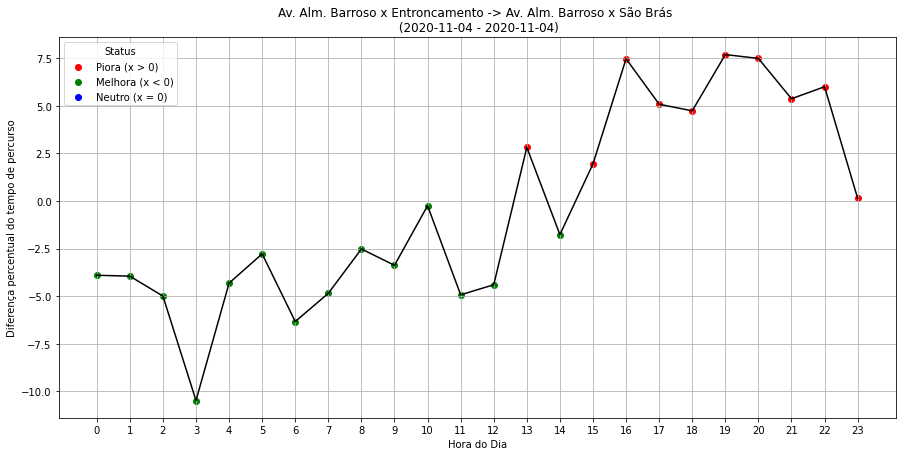

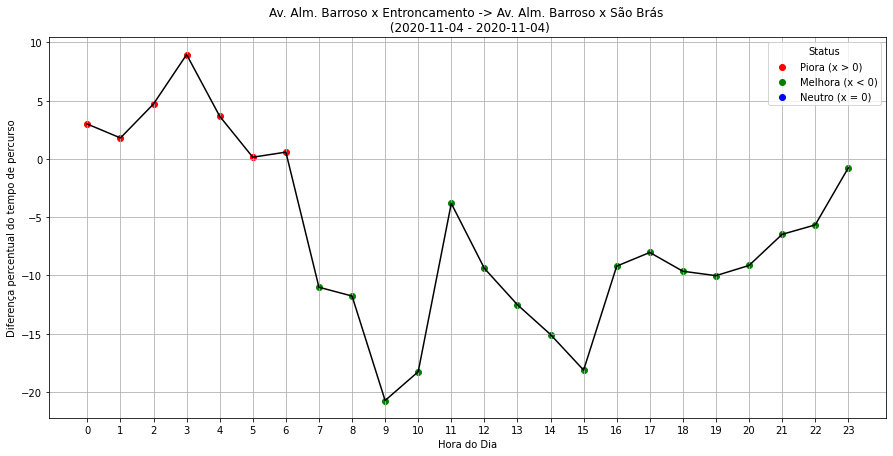

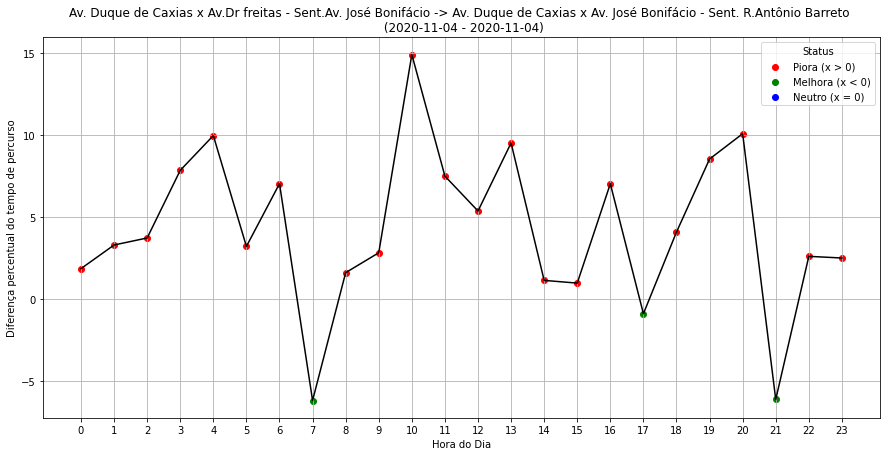

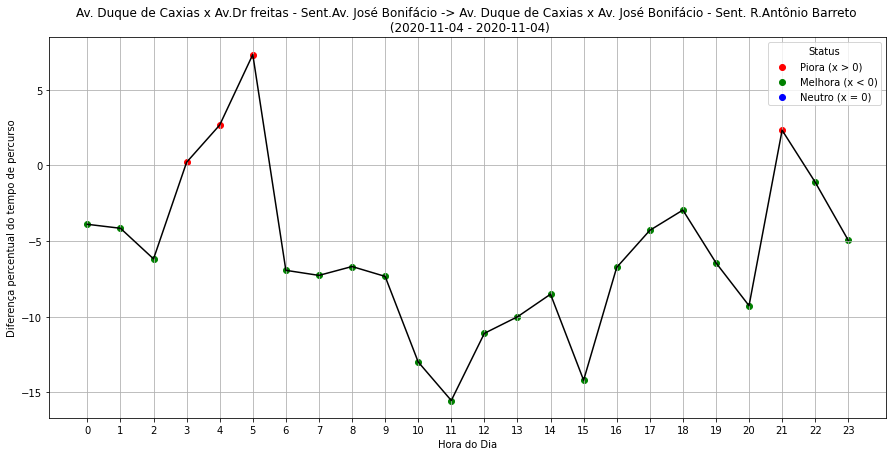

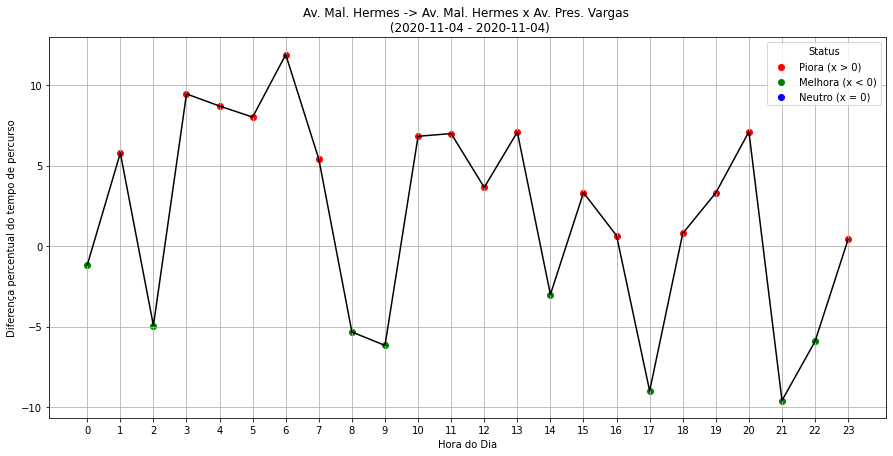

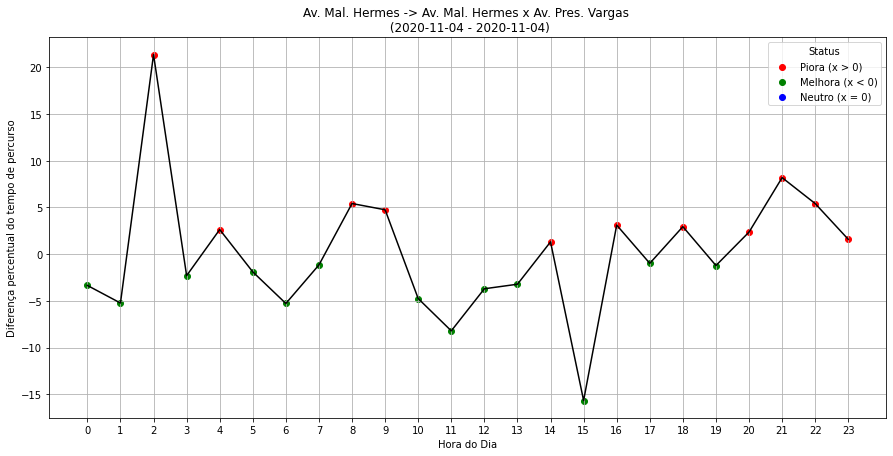

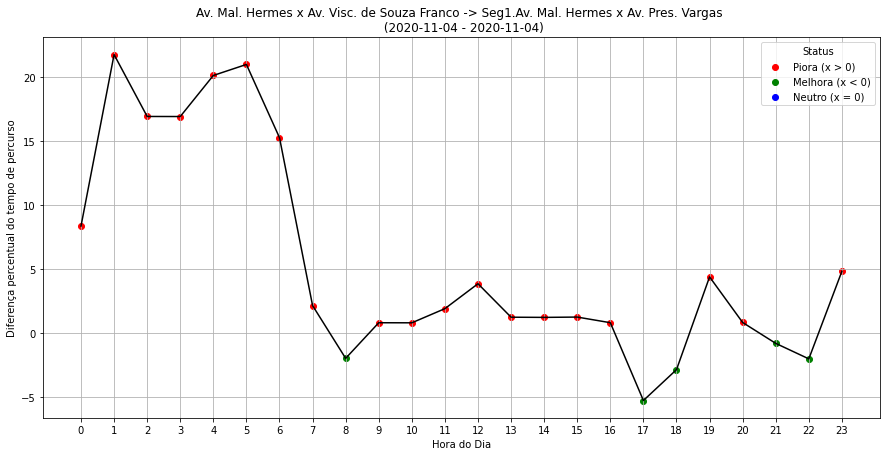

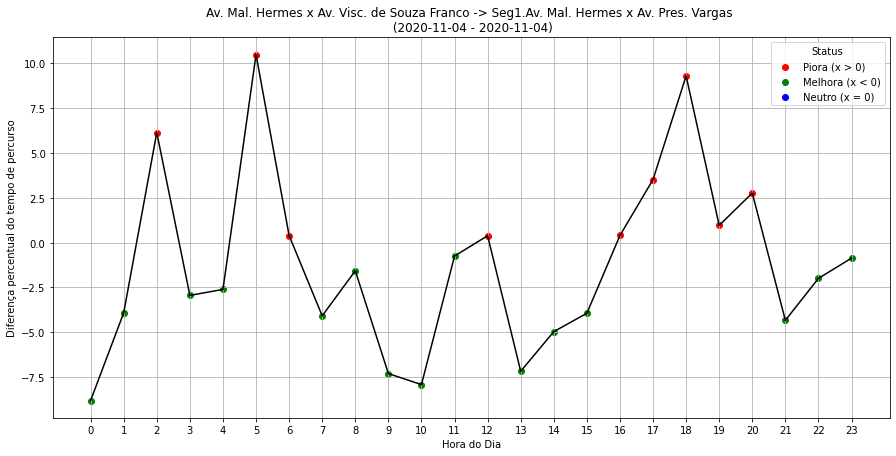

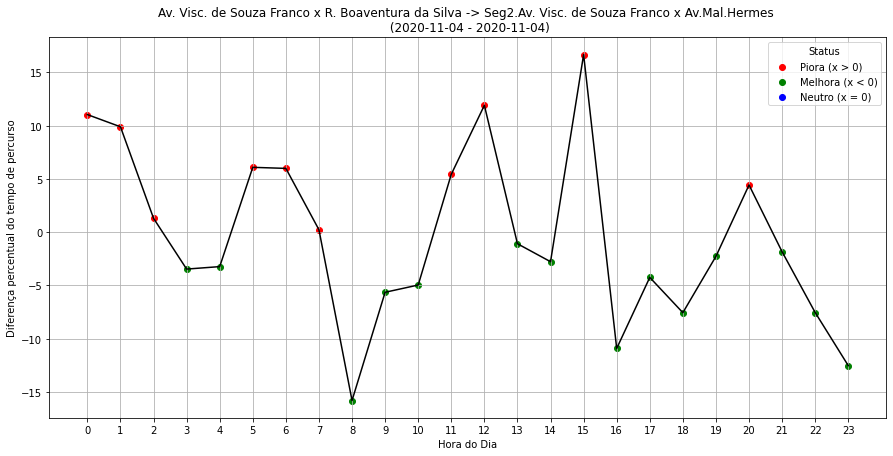

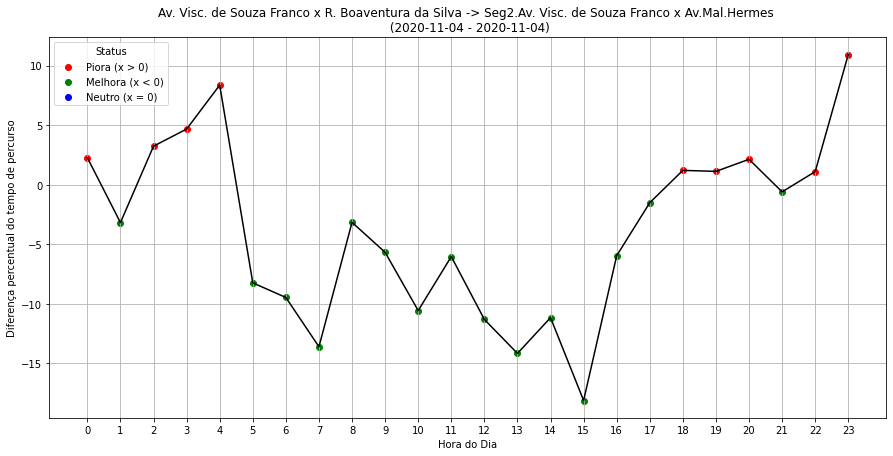

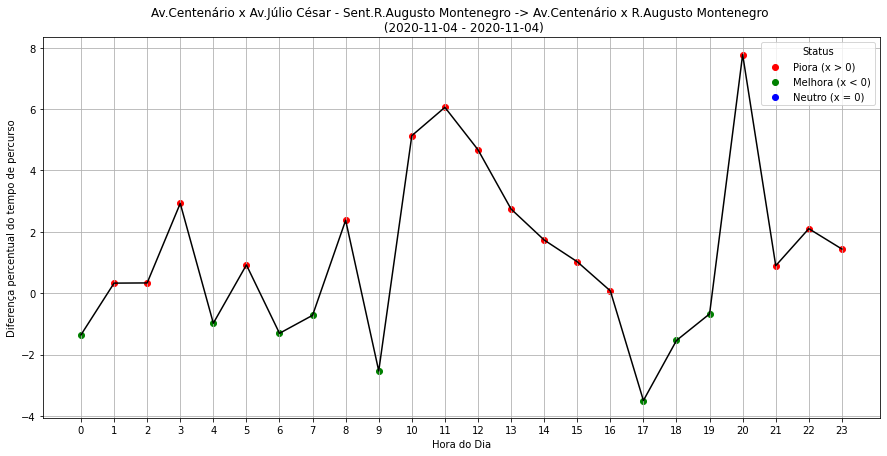

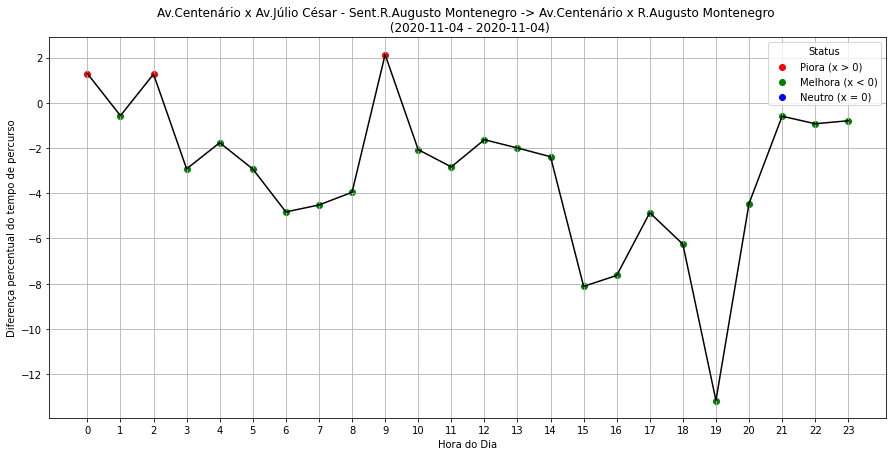

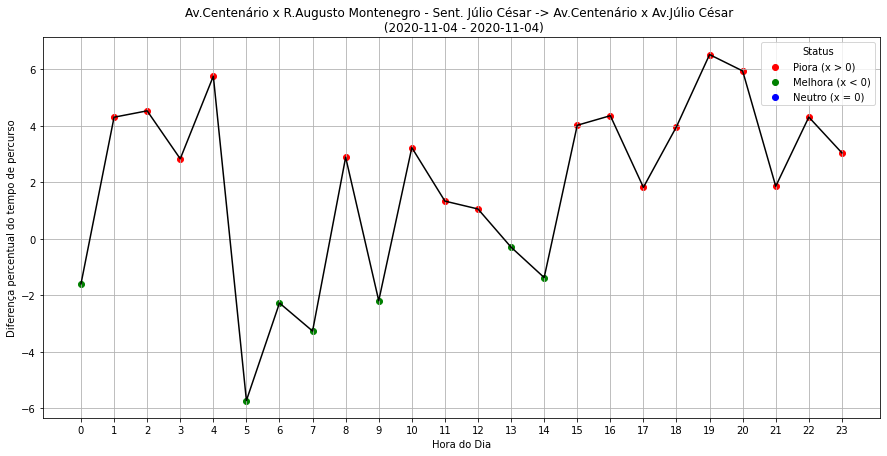

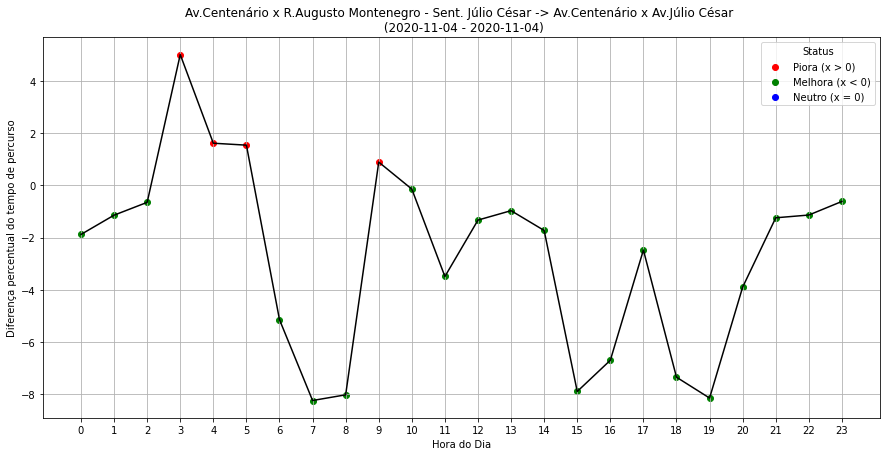

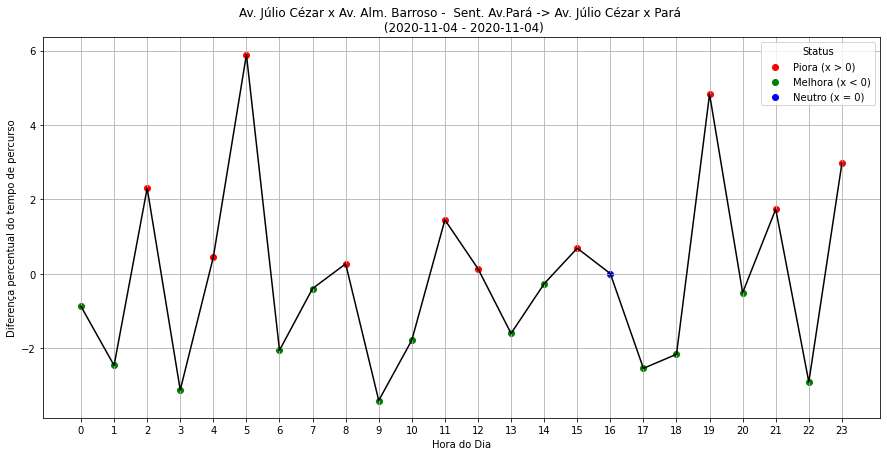

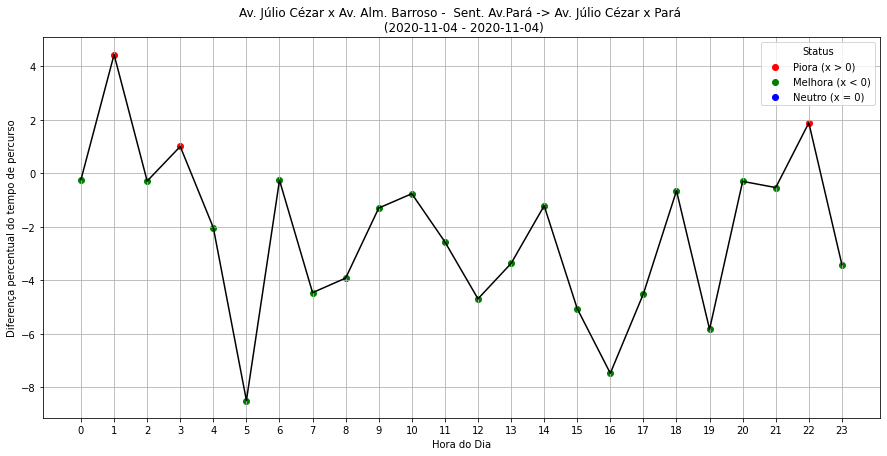

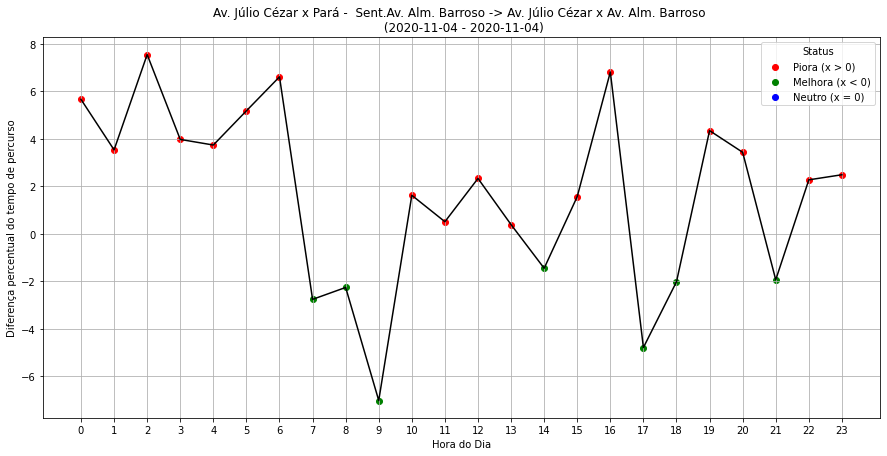

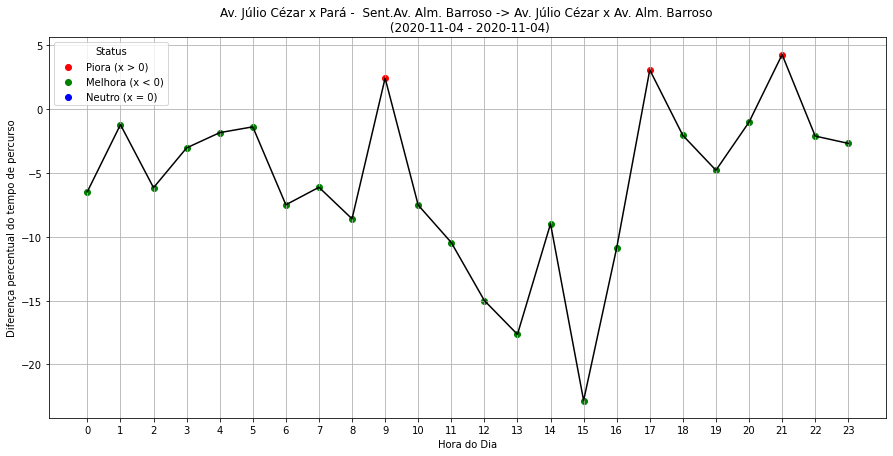

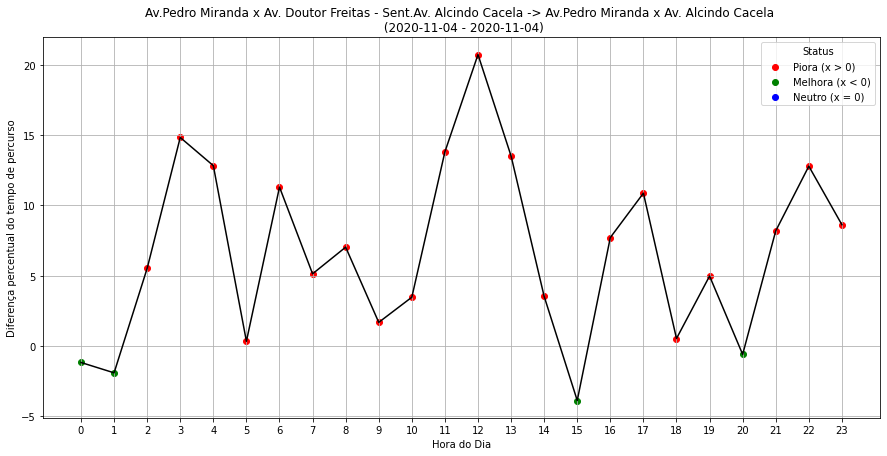

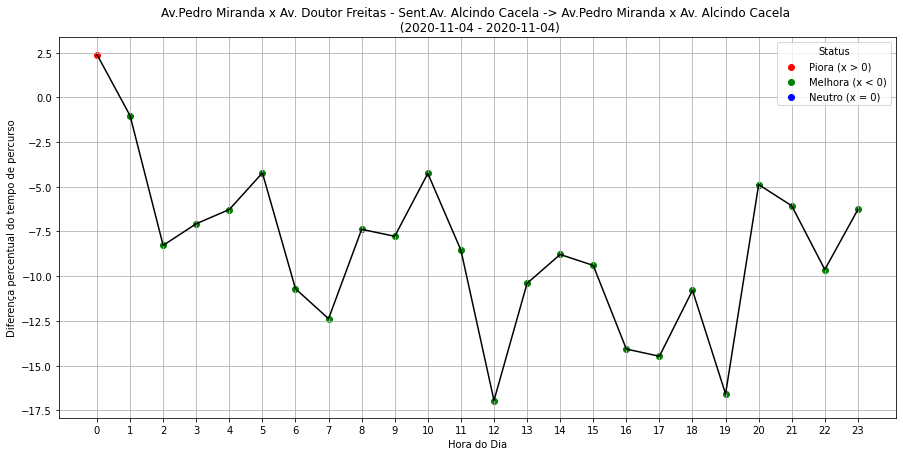

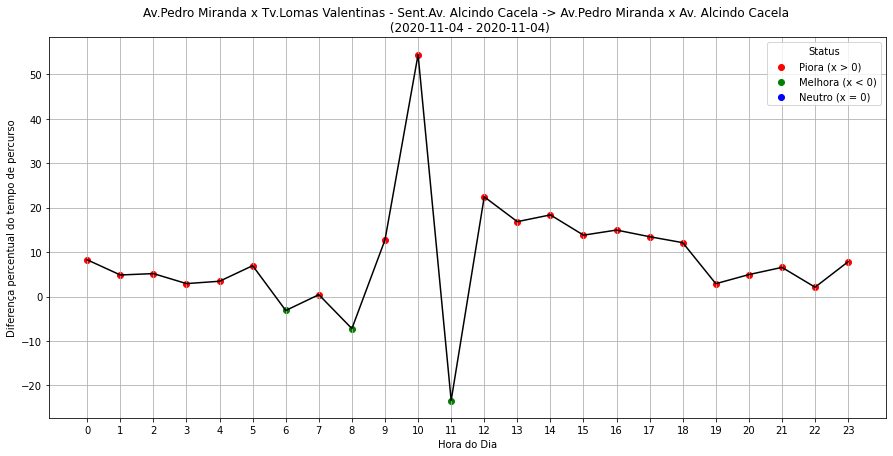

Erro: Hora 11 do dia 2020-09-04 00:00:00


ValueError: x and y must have same first dimension, but have shapes (24,) and (23,)

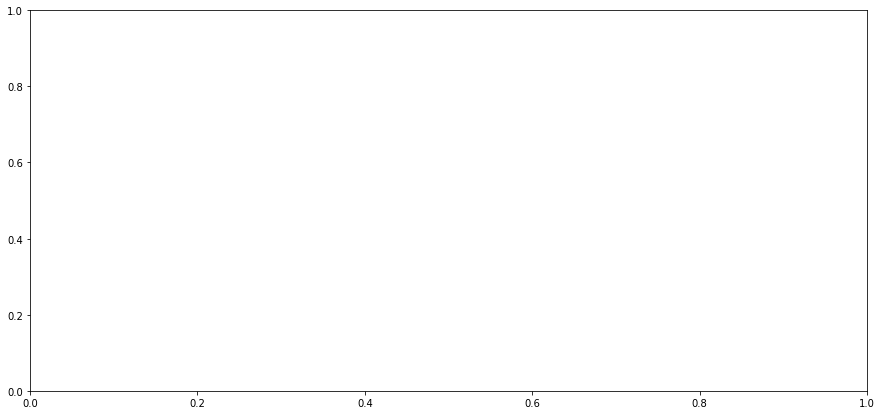

In [29]:
for route in routes:
    dfx = df.loc[df['rota'] == route]

    number_days = len(dfx.loc[dfx['hora'] == 0]) # obtem o numero de dias 

    for day in range(number_days - 1):

        time_difference = []

        for _hour in range(0, 24):
            df_ = dfx.loc[dfx['hora'] == _hour]

            # Identifica erro na quantidade de dias
            try:
                time_difference.append(round((((df_.iloc[day].tempoSegundos - df_.iloc[day + 1].tempoSegundos) / df_.iloc[day + 1].tempoSegundos) * 100), 5))
            except:
                print(f'Erro: Hora {_hour} do dia {df_.iloc[day].data}')

        _difference = difference(hours(), time_difference)

        day1 = str(df.iloc[day].data).replace(' 00:00:00', '')
        day2 = str(df.iloc[day + 1].data).replace(' 00:00:00', '')
        
        plot_line(route, day1, day2, _difference, time_difference)